In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
import numpy as np
from six.moves import cPickle as pickle
from six.moves import range
import matplotlib.pyplot as plt
import os
import urllib
import random
import scipy.io as sio
%matplotlib inline
print "Done"

Done


In [47]:
testing_size = 26032
raw_test_data = sio.loadmat("test_32x32.mat")
test_dataset, test_labels = raw_test_data["X"], raw_test_data["y"]

%xdel raw_test_data

print "Test dataset shape:",test_dataset.shape
print "Test labels shape:",test_labels.shape

Test dataset shape: (32, 32, 3, 26032)
Test labels shape: (26032, 1)


In [124]:
IMAGE_SIZE=32
N_CHANNELS=1

In [48]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [53]:
# get an image
i = random.randrange(0,test_labels.shape[0])
i= 22228
img = test_dataset[:,:,:,i]

PIXEL_DEPTH=255
# normilize it
img = rgb2gray(img)
img = (img - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH # normilize

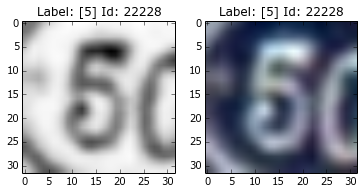

In [54]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img, cmap=plt.cm.Greys);
ax1.set_title('Label: ' + str(test_labels[i])+ " Id: " + str(i))

ax2.imshow(test_dataset[:,:,:,i], cmap=plt.cm.Greys);
ax2.set_title('Label: ' + str(test_labels[i])+ " Id: " + str(i))

In [57]:
# get image width and height
img_height = img.shape[0]
img_width = img.shape[1]

print img_height
print img_width

32
32


(32, 32, 1)
8
(32, 8)


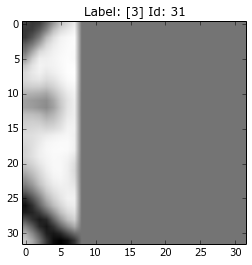

In [142]:
# iterate over 1/6 of the right portion of the image each time
# for each portion, create a 32 x 32 image filled with 0s
new_image = np.zeros(shape=(IMAGE_SIZE, IMAGE_SIZE, N_CHANNELS), dtype=np.float32)
print new_image.shape

image_step = int(img_width / 4)
print image_step

cropped_img = img[:, :image_step]
print cropped_img.shape

for i in range(cropped_img.shape[0]):
    for j in range(cropped_img.shape[1]):
        new_image[i][j] = cropped_img[i][j]
        
_, (ax1) = plt.subplots(1, 1)
ax1.imshow(new_image.reshape(32,32), cmap=plt.cm.Greys);
ax1.set_title('Label: ' + str(test_labels[i])+ " Id: " + str(i))